<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исходные-данные" data-toc-modified-id="Исходные-данные-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исходные данные</a></span></li><li><span><a href="#План-проекта" data-toc-modified-id="План-проекта-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>План проекта</a></span></li><li><span><a href="#Установка-и-импорт-библиотек" data-toc-modified-id="Установка-и-импорт-библиотек-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Установка и импорт библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Поиск-дубликатов" data-toc-modified-id="Поиск-дубликатов-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Поиск дубликатов</a></span></li><li><span><a href="#Распределение-параметров" data-toc-modified-id="Распределение-параметров-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Распределение параметров</a></span></li><li><span><a href="#Проверка-на-мультиколлинеарность" data-toc-modified-id="Проверка-на-мультиколлинеарность-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Проверка на мультиколлинеарность</a></span></li></ul></li><li><span><a href="#Исследование-кластеризации" data-toc-modified-id="Исследование-кластеризации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Исследование кластеризации</a></span><ul class="toc-item"><li><span><a href="#Метод-K-Means-и-Mini-batch-K-Means" data-toc-modified-id="Метод-K-Means-и-Mini-batch-K-Means-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Метод K-Means и Mini-batch K-Means</a></span></li><li><span><a href="#Метод-DBSCAN" data-toc-modified-id="Метод-DBSCAN-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Метод DBSCAN</a></span></li><li><span><a href="#Иерархическая-кластеризация" data-toc-modified-id="Иерархическая-кластеризация-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Иерархическая кластеризация</a></span></li><li><span><a href="#Выбор-метода-кластеризации" data-toc-modified-id="Выбор-метода-кластеризации-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Выбор метода кластеризации</a></span></li></ul></li><li><span><a href="#Поиск-соответствий" data-toc-modified-id="Поиск-соответствий-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Поиск соответствий</a></span><ul class="toc-item"><li><span><a href="#Поиск-с-помощью-Annoy" data-toc-modified-id="Поиск-с-помощью-Annoy-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Поиск с помощью Annoy</a></span></li><li><span><a href="#Поиск-с-помощью-FAISS" data-toc-modified-id="Поиск-с-помощью-FAISS-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Поиск с помощью FAISS</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Мастерская 2 - DS+: Мэтчинг товаров

## Исходные данные

Обучающий датасет, валидационный датасет и base (датасет со всеми товарами) содержат индексы товаров из base, обезличенные признаки товаров и “правильные ответы” - индексы наиболее подходящих товаров-аналогов (кроме валидационного датасета - для него “правильные ответы” содержатся в отдельном файле). Данные достаточно объемные (более 2 Гб). Также существует уменьшенная (~10% от исходной) версия датасета.

В качестве метрики используется accuracy@n.
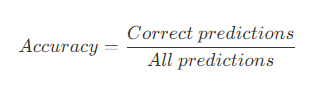
"Представим расчет метрики в цикле, перебирая все предложенные моделью ответы. При этом каждое предсказание содержит в себе не 1 ответ, а сразу n, и если среди предложенных вариантов окажется правильный - числитель и знаменатель увеличиваются на 1. А если нет ни одного - то на 1 увеличивается только знаменатель. В нашей задаче n = 5. Хорошо бы добиться accuracy@5 ≥ 0,7."

## План проекта

1. Загрузить данные (воспользовавшись способом из обучающего примера, т.к. данные большие)
2. Провести исследовательский анализ
3. Изучить данные с помощью FAISS
4. Разработать ранжирующую модель
5. Написать вывод

## Установка и импорт библиотек

In [7]:
!pip install --upgrade scikit-learn -q


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install faiss-cpu==1.7.4 -q


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install --user annoy -q

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      running bdist_wheel
      running build
      running build_py
      Generating grammar tables from c:\program files\python39\lib\lib2to3\Grammar.txt
      Writing grammar tables to c:\program files\python39\lib\lib2to3\Grammar3.9.0.final.0.pickle
      Writing failed: [Errno 13] Permission denied: 'c:\\program files\\python39\\lib\\lib2to3\\Grammar3.9.0.final.0.pickle'
      Generating grammar tables from c:\program files\python39\lib\lib2to3\PatternGrammar.txt
      Writing grammar tables to c:\program files\python39\lib\lib2to3\PatternGrammar3.9.0.final.0.pickle
      Writing failed: [Errno 13] Permission denied: 'c:\\program files\\python39\\lib\\lib2to3\\PatternGrammar3.9.0.final.0.pickle'
      creating build
      creating build\lib.win-amd64-3.9
      creating build\lib.win-amd64-3.9\annoy
      copying annoy\__init__.py -> build\l

In [10]:
import numpy as np
import pandas as pd
import sklearn
import faiss
import requests
import os
import zipfile
import io
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import os.path

from tqdm.notebook import tqdm
from urllib.parse import urlencode
from zipfile import ZipFile

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


In [11]:
import time

from time import time
from sklearn.cluster import (KMeans, 
                             MiniBatchKMeans,
                            DBSCAN)
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [12]:
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 75)

## Загрузка данных

In [13]:
def downloader(size: str='small'):
    if size not in ['small', 'large']:
        raise Exception('Unknown Argument')
    
    if os.path.isfile('content/data.zip'):
        return
    
    elif size == 'small':
        public_key = 'https://disk.yandex.ru/d/YQElc_cNQQLSOw'
    else:
        public_key = 'https://disk.yandex.ru/d/BBEphK0EHSJ5Jw'

    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']

    download_response = requests.get(download_url)

    Path('content').mkdir(parents=True, exist_ok=True)
    open('content/data.zip', 'x') 
    
    with open('content/data.zip', 'wb') as f:
        f.write(download_response.content)

    zip_path = ('content/data.zip')

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall()

In [19]:
downloader('small')

In [20]:
# прочтем большой базовый датафрейм

df_base_large = pd.read_csv("base.csv", index_col=0)
df_base_large.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4207931-base,-43.946243,15.364378,17.515854,-132.31146,157.064420,-4.069252,-340.630860,-57.550140,128.398220,45.090958,-126.84374,4.494522,-99.842310,44.926903,177.52173,-12.291790,38.470360,105.357650,-142.46024,-80.163260,-110.368935,1047.517357,-69.594620,66.313540,84.873870,813.770071,-81.038780,16.162964,-98.244880,159.53406,27.554913,-209.184280,62.05977,-529.295053,114.598330,90.469894,-20.256914,-164.76800,-133.31387,-41.252960,-10.251193,8.289038,-131.312710,75.704500,-16.483078,40.771038,-146.096740,-143.407680,49.807987,63.434480,-30.250080,20.470263,78.079910,-128.915310,92.327680,63.885570,-141.17464,142.902590,-93.068596,-568.421584,-90.018690,-129.015670,-71.927170,30.711966,-90.190475,-24.931271,66.972534,106.346634,-44.270622,155.98834,-1074.464888,-25.066608
2710972-base,-73.004890,4.923342,-19.750746,-136.52908,99.907170,-70.709110,-567.401996,-128.890150,109.914986,201.472200,-186.22650,29.896042,-99.770996,0.126302,136.19049,-35.224740,-30.321323,-43.148834,-162.85175,-79.714510,-75.784870,1507.231274,-69.654564,43.640663,-4.779669,813.770071,43.976913,11.924875,-50.228523,166.00820,-59.505333,-115.332520,72.18324,-735.671365,96.322300,85.796360,-22.030330,-147.54501,-108.38295,-45.084892,-15.004004,-1.532826,-46.456585,197.578950,-56.199876,60.298710,-102.653340,-108.967964,58.512012,-9.678028,-85.448300,-68.686080,71.590200,-232.425690,91.706856,63.290657,-137.33595,-47.124687,-148.057400,-543.787056,-160.651600,-133.462220,-109.044660,20.916021,-171.201390,-110.596844,67.730100,8.909615,-9.470253,133.29536,-545.897014,-72.913230
1371460-base,-85.565570,-0.493598,-48.374817,-157.98502,96.809510,-81.710210,-22.297688,79.768670,124.357086,105.715180,-149.80756,-54.501680,-21.037973,-24.887660,128.38864,-58.558483,34.862656,19.784412,-130.91820,-79.032230,-166.635250,1507.231274,-8.495993,61.205086,25.895348,813.770071,-140.768860,20.872790,-123.957570,126.34781,11.713674,-125.025154,152.68590,-1018.469545,-22.444600,73.897640,9.190645,-156.51881,-92.18573,-34.926760,-13.277475,16.026424,-33.853546,119.604520,-52.525341,71.204750,-178.702940,-88.278500,30.501453,16.651737,-88.377014,-55.883583,70.182980,-89.233925,92.005780,76.458725,-131.14087,40.914352,-157.900540,-394.319235,-87.107025,-120.772545,-58.821650,41.369606,-132.934500,-43.016839,67.871925,141.778240,69.048520,111.72038,-1111.038833,-23.087206
3438601-base,-105.564090,15.393871,-46.223934,-158.11488,79.514114,-48.944480,-93.713010,38.581398,123.397960,110.324326,-161.18800,-68.519790,-0.607330,38.733696,120.74344,-14.109269,28.868027,-29.858810,-94.30395,-79.339810,-138.984270,1507.231274,-131.885380,70.031360,32.736595,813.770071,-62.370860,13.763219,-31.872276,139.55270,9.836465,-150.221130,80.14020,-537.183707,3.091667,129.699330,-63.429424,-169.02724,-119.77007,-28.637785,-8.315162,2.752385,-160.293820,85.086890,-18.251750,90.374054,1.479935,-121.983050,65.852660,8.355225,34.118896,-57.069756,70.461800,-127.905410,94.314280,71.259940,-135.57787,-39.982346,-159.751560,-230.147648,-95.221160,-148.814090,-87.907290,-58.806870,-147.794800,-155.830237,68.974754,21.397510,126.098785,139.73320,-1282.707248,-74.527940
422798-base,-74.638880,11.315012,-40.204174,-161.76430,50.507114,-80.775560,-640.923467,65.225000,122.344940,191.465850,-156.98384,-76.650210,-75.674970,12.624029,145.33752,-35.774258,11.598761,-11.460761,-201.35443,-77.779366,-120.968400,548.736883,19.851685,17.943344,27.063320,813.770071,-85.483780,21.236433,-95.071020,132.61092,13.526038,-160.476840,104.71937,-304.174382,-15.385452,91.418655,-36.474556,-157.43959,-102.83162,-56.782710,-19.969252,-0.598189,-222.228790,33.441666,-56.092110,71.276030,-8.713509,-86.099380,8.488903,-14.959278,86.812996,-29.6

In [21]:
# оценим объем данных

df_base_large.shape

(291813, 72)

In [23]:
# прочтем большой тренировочный датафрейм

df_train_large = pd.read_csv("train.csv", index_col=0)
df_train_large.shape

(9999, 73)

In [25]:
# прочтем большой валидационный датафрейм

df_validation_large = pd.read_csv("validation.csv", index_col=0)
df_validation_large.shape

(10000, 72)

In [27]:
# прочтем большой файл с "ответами"

df_validation_answer_large = pd.read_csv("validation_answer.csv", index_col=0)
df_validation_answer_large.shape

(10000, 1)

In [28]:
# прочтем малый базовый датафрейм

df_base_small = pd.read_csv("base.csv", index_col=0)
df_base_small.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4207931-base,-43.946243,15.364378,17.515854,-132.31146,157.064420,-4.069252,-340.630860,-57.550140,128.398220,45.090958,-126.84374,4.494522,-99.842310,44.926903,177.52173,-12.291790,38.470360,105.357650,-142.46024,-80.163260,-110.368935,1047.517357,-69.594620,66.313540,84.873870,813.770071,-81.038780,16.162964,-98.244880,159.53406,27.554913,-209.184280,62.05977,-529.295053,114.598330,90.469894,-20.256914,-164.76800,-133.31387,-41.252960,-10.251193,8.289038,-131.312710,75.704500,-16.483078,40.771038,-146.096740,-143.407680,49.807987,63.434480,-30.250080,20.470263,78.079910,-128.915310,92.327680,63.885570,-141.17464,142.902590,-93.068596,-568.421584,-90.018690,-129.015670,-71.927170,30.711966,-90.190475,-24.931271,66.972534,106.346634,-44.270622,155.98834,-1074.464888,-25.066608
2710972-base,-73.004890,4.923342,-19.750746,-136.52908,99.907170,-70.709110,-567.401996,-128.890150,109.914986,201.472200,-186.22650,29.896042,-99.770996,0.126302,136.19049,-35.224740,-30.321323,-43.148834,-162.85175,-79.714510,-75.784870,1507.231274,-69.654564,43.640663,-4.779669,813.770071,43.976913,11.924875,-50.228523,166.00820,-59.505333,-115.332520,72.18324,-735.671365,96.322300,85.796360,-22.030330,-147.54501,-108.38295,-45.084892,-15.004004,-1.532826,-46.456585,197.578950,-56.199876,60.298710,-102.653340,-108.967964,58.512012,-9.678028,-85.448300,-68.686080,71.590200,-232.425690,91.706856,63.290657,-137.33595,-47.124687,-148.057400,-543.787056,-160.651600,-133.462220,-109.044660,20.916021,-171.201390,-110.596844,67.730100,8.909615,-9.470253,133.29536,-545.897014,-72.913230
1371460-base,-85.565570,-0.493598,-48.374817,-157.98502,96.809510,-81.710210,-22.297688,79.768670,124.357086,105.715180,-149.80756,-54.501680,-21.037973,-24.887660,128.38864,-58.558483,34.862656,19.784412,-130.91820,-79.032230,-166.635250,1507.231274,-8.495993,61.205086,25.895348,813.770071,-140.768860,20.872790,-123.957570,126.34781,11.713674,-125.025154,152.68590,-1018.469545,-22.444600,73.897640,9.190645,-156.51881,-92.18573,-34.926760,-13.277475,16.026424,-33.853546,119.604520,-52.525341,71.204750,-178.702940,-88.278500,30.501453,16.651737,-88.377014,-55.883583,70.182980,-89.233925,92.005780,76.458725,-131.14087,40.914352,-157.900540,-394.319235,-87.107025,-120.772545,-58.821650,41.369606,-132.934500,-43.016839,67.871925,141.778240,69.048520,111.72038,-1111.038833,-23.087206
3438601-base,-105.564090,15.393871,-46.223934,-158.11488,79.514114,-48.944480,-93.713010,38.581398,123.397960,110.324326,-161.18800,-68.519790,-0.607330,38.733696,120.74344,-14.109269,28.868027,-29.858810,-94.30395,-79.339810,-138.984270,1507.231274,-131.885380,70.031360,32.736595,813.770071,-62.370860,13.763219,-31.872276,139.55270,9.836465,-150.221130,80.14020,-537.183707,3.091667,129.699330,-63.429424,-169.02724,-119.77007,-28.637785,-8.315162,2.752385,-160.293820,85.086890,-18.251750,90.374054,1.479935,-121.983050,65.852660,8.355225,34.118896,-57.069756,70.461800,-127.905410,94.314280,71.259940,-135.57787,-39.982346,-159.751560,-230.147648,-95.221160,-148.814090,-87.907290,-58.806870,-147.794800,-155.830237,68.974754,21.397510,126.098785,139.73320,-1282.707248,-74.527940
422798-base,-74.638880,11.315012,-40.204174,-161.76430,50.507114,-80.775560,-640.923467,65.225000,122.344940,191.465850,-156.98384,-76.650210,-75.674970,12.624029,145.33752,-35.774258,11.598761,-11.460761,-201.35443,-77.779366,-120.968400,548.736883,19.851685,17.943344,27.063320,813.770071,-85.483780,21.236433,-95.071020,132.61092,13.526038,-160.476840,104.71937,-304.174382,-15.385452,91.418655,-36.474556,-157.43959,-102.83162,-56.782710,-19.969252,-0.598189,-222.228790,33.441666,-56.092110,71.276030,-8.713509,-86.099380,8.488903,-14.959278,86.812996,-29.6

In [29]:
# оценим размер малого файла

df_base_small.shape

(291813, 72)

In [30]:
# прочтем малый тренировочный датафрейм

df_train_small = pd.read_csv("train.csv", index_col=0)
df_train_small.shape

(9999, 73)

In [31]:
# прочтем малый валидационный датафрейм

df_validation_small = pd.read_csv("validation.csv", index_col=0)
df_validation_small.shape

(10000, 72)

In [32]:
# прочтем малый файл с "ответами

df_validation_answer_small = pd.read_csv("validation_answer.csv", index_col=0)
df_validation_answer_small.shape

(10000, 1)

Какие именно данные нам переданы на изучение:

- файл `base` - анонимизированный набор товаров. Каждый товар представлен как уникальный id (1-base, 2-base и т.д.) и вектор признаков размерностью 72.
- файл `train` - обучающий датасет. Каждая строка - один товар, для которого известен уникальный id (0-query, 1-query и т.д.), вектор признаков и id товара из `base.csv`, который максимально похож на него по мнению экспертов.
- файл `validation` - датасет с товарами (уникальный id и вектор признаков), для которых надо найти наиболее близкие товары из `base.csv`.
- файл `validation_answers` - правильные ответы к файлу `validation`.

Общая задача звучит, как "разработать алгоритм, который для всех товаров из `validation.csv` предложит несколько вариантов наиболее похожих товаров из `base.csv`.

Метрика объявлена ранее - accuracy@5.

Предостален некий baseline, который можно повторить, для первичного понимания работы алгоритма.

## Исследовательский анализ данных

In [33]:
# посмотрим общий вид данных большого файла

df_base_large.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
count,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000,291813.000000
mean,-86.274741,8.078087,-44.613480,-146.605552,111.261183,-71.875015,-393.430460,20.391975,123.676692,124.427158,-143.241671,-69.943874,-41.180997,7.608319,148.940275,-23.195314,-0.939536,-19.230876,-137.380758,-79.189608,-98.276602,1257.119646,-6.817302,56.737918,26.645141,726.539553,-65.999767,16.297703,-86.279764,151.737398,-11.569343,-144.233906,87.271323,-555.030333,36.354556,75.165481,-16.450743,-146.667125,-118.525117,-41.902869,-9.505951,4.069182,-112.666843,120.820683,-39.788570,58.962295,-85.102851,-138.542656,47.962621,-32.597303,26.591666,-21.808728,67.033070,-117.973309,88.033431,69.206822,-132.891610,13.104575,-119.628076,-315.824414,-64.894401,-130.688468,-79.075207,33.244836,-154.720293,13.699277,67.792659,23.543147,74.890028,115.611366,-798.355219,-47.701336
std,24.918947,4.949495,38.545928,19.842726,46.350083,28.189743,272.084921,64.297194,6.352832,64.366631,41.828261,51.194297,38.942859,36.576025,33.623142,13.078519,20.826134,52.952607,46.676018,0.757619,28.155715,400.140140,51.984937,34.382587,38.963153,206.009752,61.551614,4.657027,48.329281,10.093783,28.934056,34.905297,27.781245,260.728908,39.894835,21.457381,25.832185,9.952702,13.125440,19.208804,8.188480,5.829764,56.950392,46.780878,14.735848,32.027228,63.265200,57.718288,45.199092,58.254867,59.066918,51.778506,13.063570,54.774973,4.773332,11.955396,7.820257,51.070116,55.163448,210.631518,62.525113,9.573147,30.485074,28.896144,41.217568,98.996416,1.825081,55.353032,61.320347,21.219222,385.414338,41.731025
min,-189.356020,-12.594500,-231.785920,-224.880500,-95.240830,-188.473330,-791.468770,-296.171050,93.684616,-143.499600,-321.522580,-367.130700,-215.223530,-175.623890,-9.157745,-84.724250,-96.368160,-237.018780,-348.336240,-82.659546,-230.840270,136.855507,-219.015870,-83.704820,-143.183290,-61.967366,-327.226200,-7.296732,-302.772400,107.650450,-146.495420,-288.613980,-25.102974,-1045.311529,-126.765594,-8.800842,-125.226540,-190.385990,-168.637420,-130.044040,-44.640232,-19.545673,-335.376220,-78.077320,-63.102401,-71.691635,-334.213750,-389.026640,-133.092030,-322.812070,-245.635030,-264.633450,16.126598,-361.489350,66.851030,18.996754,-165.421420,-196.183610,-328.829280,-681.042024,-400.791100,-169.028370,-214.821140,-85.825500,-346.239320,-157.593866,59.835790,-213.492420,-190.483150,18.601448,-1297.924962,-209.935760
25%,-103.154300,4.709408,-69.535900,-159.882740,80.367640,-91.227936,-631.937855,-22.085905,119.473625,81.685610,-170.579130,-103.997734,-66.559790,-16.890121,126.042564,-31.799664,-15.135077,-55.462906,-167.724230,-79.680220,-116.912186,1086.240670,-42.276604,33.351940,0.418633,813.770071,-107.548615,13.250520,-118.420650,144.899320,-30.690517,-167.123320,68.438130,-771.296708,9.454500,60.934887,-34.117690,-153.286560,-127.443540,-5

In [34]:
df_base_large.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291813 entries, 4207931-base to 274130-base
Data columns (total 72 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       291813 non-null  float64
 1   1       291813 non-null  float64
 2   2       291813 non-null  float64
 3   3       291813 non-null  float64
 4   4       291813 non-null  float64
 5   5       291813 non-null  float64
 6   6       291813 non-null  float64
 7   7       291813 non-null  float64
 8   8       291813 non-null  float64
 9   9       291813 non-null  float64
 10  10      291813 non-null  float64
 11  11      291813 non-null  float64
 12  12      291813 non-null  float64
 13  13      291813 non-null  float64
 14  14      291813 non-null  float64
 15  15      291813 non-null  float64
 16  16      291813 non-null  float64
 17  17      291813 non-null  float64
 18  18      291813 non-null  float64
 19  19      291813 non-null  float64
 20  20      291813 non-null  float64
 21 

In [35]:
df_base_large.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
61    0
62    0
63    0
64    0
65    0
66    0
67    0
68    0
69    0
70    0
71    0
dtype: int64

Пропусков в данных нет. Все колонки, кроме индекса, численные.

Проверим, что с остальными данными - аналогичная картина.

In [36]:
df_train_large.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 109249-query to 13504-query
Data columns (total 73 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       9999 non-null   float64
 1   1       9999 non-null   float64
 2   2       9999 non-null   float64
 3   3       9999 non-null   float64
 4   4       9999 non-null   float64
 5   5       9999 non-null   float64
 6   6       9999 non-null   float64
 7   7       9999 non-null   float64
 8   8       9999 non-null   float64
 9   9       9999 non-null   float64
 10  10      9999 non-null   float64
 11  11      9999 non-null   float64
 12  12      9999 non-null   float64
 13  13      9999 non-null   float64
 14  14      9999 non-null   float64
 15  15      9999 non-null   float64
 16  16      9999 non-null   float64
 17  17      9999 non-null   float64
 18  18      9999 non-null   float64
 19  19      9999 non-null   float64
 20  20      9999 non-null   float64
 21  21      9999 non-null   

In [37]:
df_validation_large.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 196680-query to 43566-query
Data columns (total 72 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
 3   3       10000 non-null  float64
 4   4       10000 non-null  float64
 5   5       10000 non-null  float64
 6   6       10000 non-null  float64
 7   7       10000 non-null  float64
 8   8       10000 non-null  float64
 9   9       10000 non-null  float64
 10  10      10000 non-null  float64
 11  11      10000 non-null  float64
 12  12      10000 non-null  float64
 13  13      10000 non-null  float64
 14  14      10000 non-null  float64
 15  15      10000 non-null  float64
 16  16      10000 non-null  float64
 17  17      10000 non-null  float64
 18  18      10000 non-null  float64
 19  19      10000 non-null  float64
 20  20      10000 non-null  float64
 21  21      10000 non-null 

In [38]:
df_base_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291813 entries, 4207931-base to 274130-base
Data columns (total 72 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       291813 non-null  float64
 1   1       291813 non-null  float64
 2   2       291813 non-null  float64
 3   3       291813 non-null  float64
 4   4       291813 non-null  float64
 5   5       291813 non-null  float64
 6   6       291813 non-null  float64
 7   7       291813 non-null  float64
 8   8       291813 non-null  float64
 9   9       291813 non-null  float64
 10  10      291813 non-null  float64
 11  11      291813 non-null  float64
 12  12      291813 non-null  float64
 13  13      291813 non-null  float64
 14  14      291813 non-null  float64
 15  15      291813 non-null  float64
 16  16      291813 non-null  float64
 17  17      291813 non-null  float64
 18  18      291813 non-null  float64
 19  19      291813 non-null  float64
 20  20      291813 non-null  float64
 21 

In [39]:
df_train_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 109249-query to 13504-query
Data columns (total 73 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       9999 non-null   float64
 1   1       9999 non-null   float64
 2   2       9999 non-null   float64
 3   3       9999 non-null   float64
 4   4       9999 non-null   float64
 5   5       9999 non-null   float64
 6   6       9999 non-null   float64
 7   7       9999 non-null   float64
 8   8       9999 non-null   float64
 9   9       9999 non-null   float64
 10  10      9999 non-null   float64
 11  11      9999 non-null   float64
 12  12      9999 non-null   float64
 13  13      9999 non-null   float64
 14  14      9999 non-null   float64
 15  15      9999 non-null   float64
 16  16      9999 non-null   float64
 17  17      9999 non-null   float64
 18  18      9999 non-null   float64
 19  19      9999 non-null   float64
 20  20      9999 non-null   float64
 21  21      9999 non-null   

In [40]:
df_validation_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 196680-query to 43566-query
Data columns (total 72 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
 3   3       10000 non-null  float64
 4   4       10000 non-null  float64
 5   5       10000 non-null  float64
 6   6       10000 non-null  float64
 7   7       10000 non-null  float64
 8   8       10000 non-null  float64
 9   9       10000 non-null  float64
 10  10      10000 non-null  float64
 11  11      10000 non-null  float64
 12  12      10000 non-null  float64
 13  13      10000 non-null  float64
 14  14      10000 non-null  float64
 15  15      10000 non-null  float64
 16  16      10000 non-null  float64
 17  17      10000 non-null  float64
 18  18      10000 non-null  float64
 19  19      10000 non-null  float64
 20  20      10000 non-null  float64
 21  21      10000 non-null 

### Поиск дубликатов

In [41]:
# проверим на полные дубликаты

df_base_large.duplicated().sum()

11278

In [42]:
# проверим на полные дубликаты тренировочный большой файл

df_train_large.duplicated().sum()

243

In [43]:
# проверим на полные дубликаты валидационный большой файл

df_validation_large.duplicated().sum()

265

In [44]:
# проверим на полные дубликаты большой файл с "ответами"

df_validation_answer_large.duplicated().sum()

360

In [45]:
# проверим на полные дубликаты малый общий файл

df_base_small.duplicated().sum()

11278

In [46]:
# проверим на полные дубликаты малый тренировочный файл

df_train_small.duplicated().sum()

243

In [47]:
# проверим на полные дубликаты валидационный большой файл

df_validation_small.duplicated().sum()

265

In [48]:
# проверим на полные дубликаты малый файл с "ответами"

df_validation_answer_small.duplicated().sum()

360

Получается, у нас есть дубликаты строк вплоть до значений индекса в малой выборке. Проверим это.

In [49]:
# посчитаем количество уникальных индексов

df_base_small.index.nunique()

280535

Все верно: в датафрейме 291813 строк, из которых 280535 строк уникальны, а 11278 строк повторяют существующие. От таких повторов нужно избавляться.

Что касается повторов в "ответах" - это повторы в колонке "Аналогичного товара". По-моему, это нормально, что разным товарам из валидационной выборки оказались наиболее близки одни и те же товары из базовой выборки. Отсюда и дубликаты.

In [50]:
# количество индексов - т.е. уникальных товаров для сравнения

df_validation_answer_large.index.nunique()

9735

In [51]:
# количество аналогичных сопоставленных товаров

df_validation_answer_large.nunique()

Expected    9640
dtype: int64

Убираем дубликаты в малых датафреймах, кроме датафреймов с валидационной выборкой и "ответами". Полагаю, для расчетов нам будет важна их размерность.

In [52]:
df_base_small = df_base_small.drop_duplicates()
df_base_small.shape

(280535, 72)

In [53]:
df_train_small = df_train_small.drop_duplicates()
df_train_small.shape

(9756, 73)

### Распределение параметров

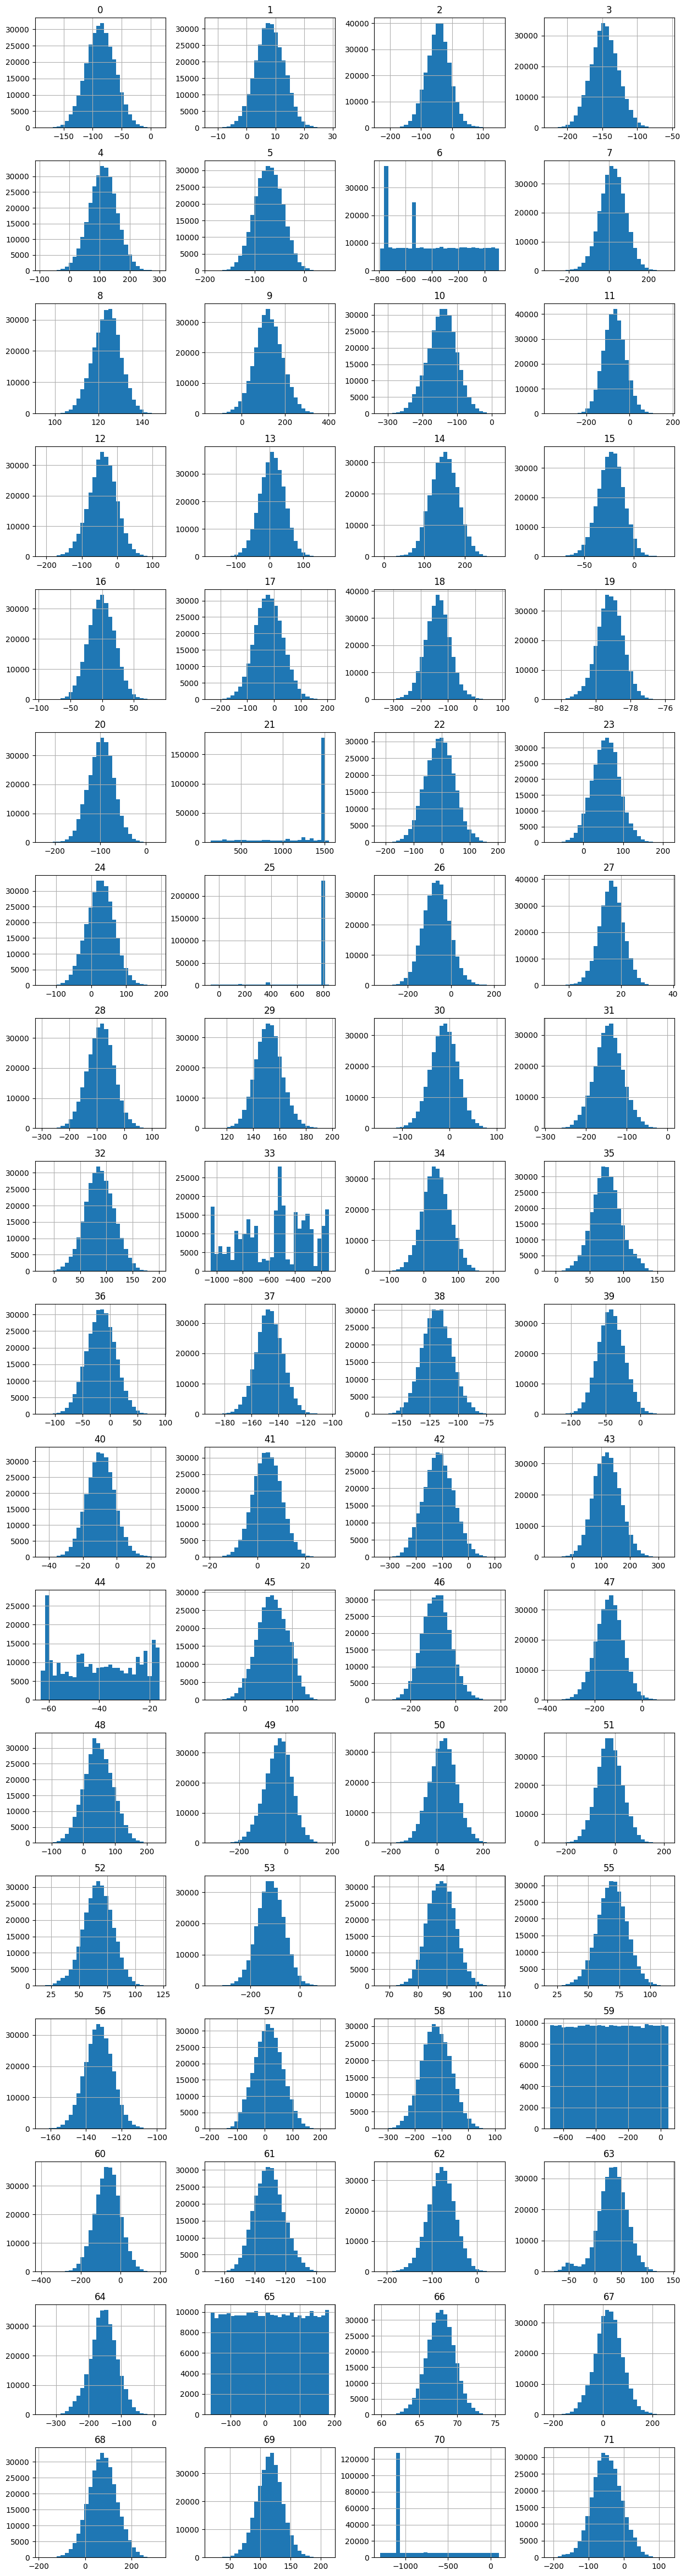

In [54]:
# построим распределение для всех параметров

fig2, axes = plt.subplots(nrows=18, ncols=4, figsize=(15,60))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i, ax in enumerate(axes.flatten()):
    df_base_large[df_base_large.columns[i]].hist(ax=ax , bins = 30)
    ax.set_title(df_base_large.columns[i])

Можно видеть, что часть признаков распределена необычно.    
Так, например, распрелеление признаков 6, 21, 25, 33, 44, 59, 65, 70 визуально отличается от распределения остальных параметров.   
Признаки 21, 25, 59, 65 и 70 можно попробовать удалить из данных.

In [55]:
# создадим датафреймы без "подозрительных" параметров

base_large = df_base_large.drop(columns=['21', '25', '59', '65', '70'])
base_large.shape

(291813, 67)

In [56]:
# аналогично уберем признаки из других датафреймов

train_large = df_train_large.drop(columns=['21', '25', '59', '65', '70'])
validation_large = df_validation_large.drop(columns=['21', '25', '59', '65', '70'])

base_small = df_base_small.drop(columns=['21', '25', '59', '65', '70'])
train_small = df_train_small.drop(columns=['21', '25', '59', '65', '70'])
validation_small = df_validation_small.drop(columns=['21', '25', '59', '65', '70'])

Оставляем в данных 67 признаков вместо 72.

Скалировать данные нет особого смысла - значения всех параметров сосредоточены в областях 10^2-10^3. Это близкие значения.

### Проверка на мультиколлинеарность

In [57]:
#
#import seaborn as sns
#import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize'] = [12, 8]

#sns.heatmap(df_base_small.corr(), cbar=True, cmap= 'coolwarm')

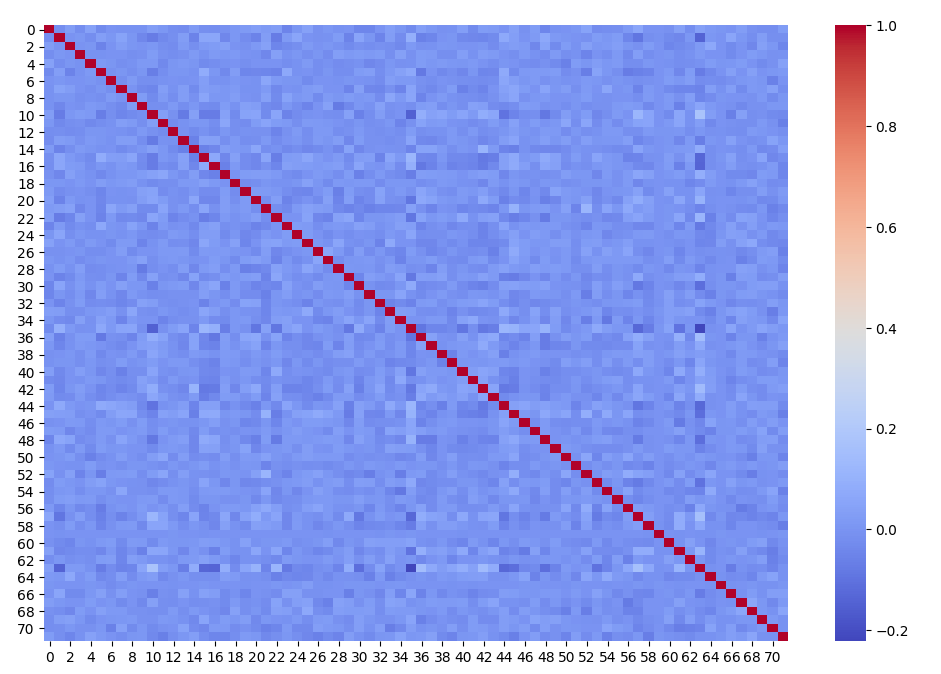

In [58]:
#sns.heatmap(df_base_large.corr(), cbar=True, cmap= 'coolwarm')

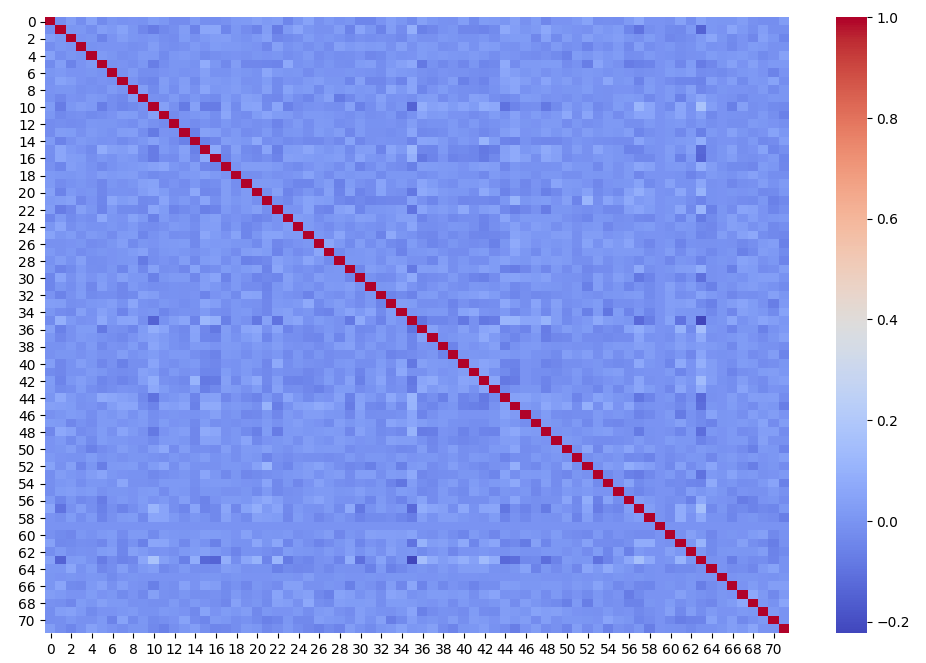

Линейной корреляции между признаками не отмечено.

## Исследование кластеризации

На вэбинарах были озвучены следующие основные методы кластеризации:
- метод K-Means
- метод DBSCAN
- иерархический алгоритм кластеризации
- графовые методы

И методы оценки кластеризации:
- "метод локтя"
- индекс Дэвиса-Болдина
- метод силуэта
- индекс Хопкинса
- метрики Среднее внутрикластерное расстояние, Среднее межкластерное расстояние, Гомогенность, Полнота, V-мера, коэффициент силуэта

### Метод K-Means и Mini-batch K-Means

Для модели K-Means в качестве метрики часто применяется "мето локтя". Необходимо несколько раз прогнать модель с разными количествами кластеров, собрать значения "инерции", и построить график. В точке излома будет находится оптимальное количество кластеров.

In [59]:
# скалирум наши данные, это важно для модели k-means

scaler = StandardScaler()

scaled_base_small = scaler.fit_transform(base_small)

In [60]:
km_scores= []
for i in range(400, 4000, 400):
    km = KMeans(init="k-means++", n_clusters=i, random_state=0).fit(scaled_base_small)
    preds = km.predict(scaled_base_small)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(scaled_base_small)))
    km_scores.append(-km.score(scaled_base_small))

Score for number of cluster(s) 400: -10972238.749370795
Score for number of cluster(s) 800: -10068874.267563049
Score for number of cluster(s) 1200: -9541147.812428324
Score for number of cluster(s) 1600: -9176019.782576535
Score for number of cluster(s) 2000: -8897857.374224031
Score for number of cluster(s) 2400: -8665466.735586891
Score for number of cluster(s) 2800: -8478318.873034995
Score for number of cluster(s) 3200: -8309906.173187678
Score for number of cluster(s) 3600: -8153969.28299534


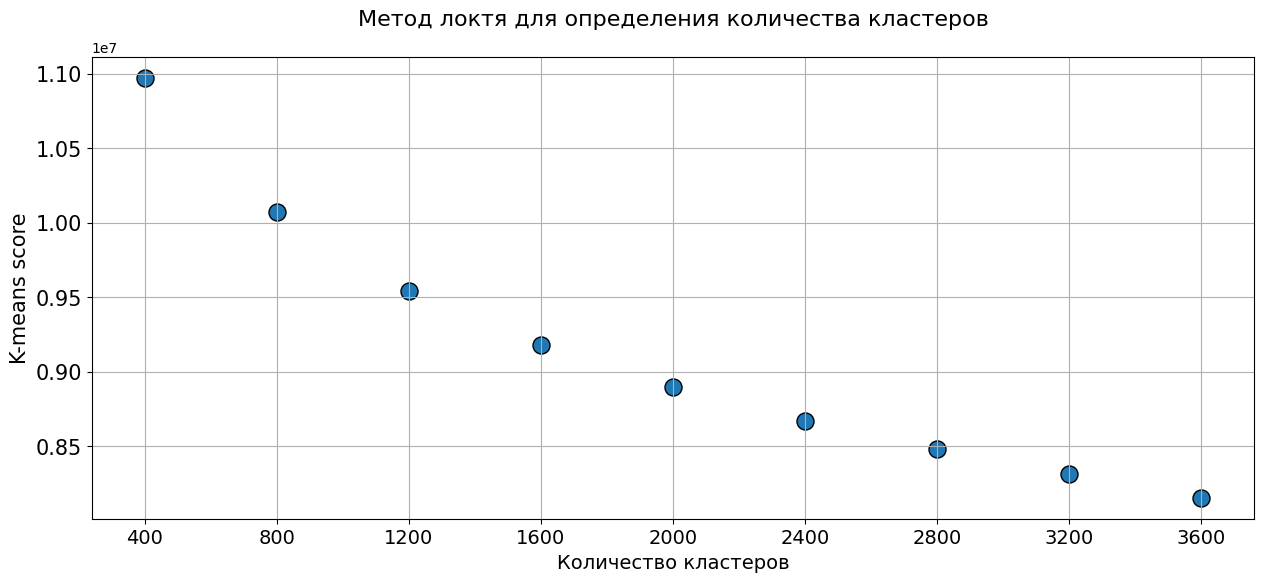

In [61]:
plt.figure(figsize=(15,6))
plt.title("Метод локтя для определения количества кластеров\n",fontsize=16)
plt.scatter(x=[i for i in range(400, 4000, 400)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Количество кластеров",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(400, 4000, 400)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

Можно оценить "локоть" в величину 2000 кластеров.

Сохраняю для скорости перепроведения тетради:
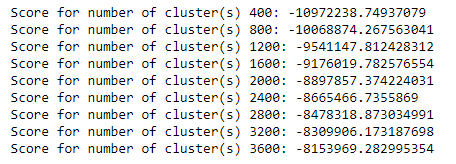
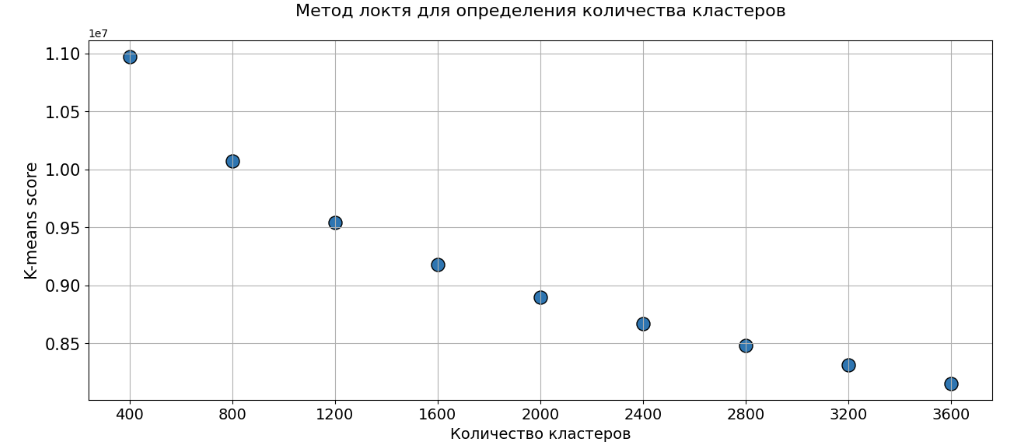

In [62]:
# инициализиуем лучшую модель k-means

k_means = KMeans(init="k-means++", n_clusters=2000, random_state=0)
start0 = time()
k_means.fit(scaled_base_small)
end0 = time()
t_k_means = (end0 - start0) / 60
t_k_means

1.809316086769104

In [63]:
# зафиксируем метки кластеров

labels_km = k_means.labels_

In [64]:
# рассчитаем коэффициент силуэта

sil_km = metrics.silhouette_score(scaled_base_small, labels_km, metric='euclidean')
print("Коэффициент силуэта:", sil_km)

Коэффициент силуэта: 0.06148499970670254


Тоже очень долго считает:
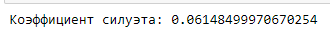

In [65]:
db_km = metrics.davies_bouldin_score(scaled_base_small, labels_km)
print("Индекс Дэвиса-Боулдина:", db_km)

ch_km = metrics.calinski_harabasz_score(scaled_base_small, labels_km)
print("Индекс Калински-Харабаша:", ch_km)

Индекс Дэвиса-Боулдина: 3.00405785592755
Индекс Калински-Харабаша: 154.9988398839959


Описание работы **коэффициента силуэта**:
- Оценка ограничена от -1 за неправильную кластеризацию до +1 за высокоплотную кластеризацию. Баллы около нуля указывают на перекрывающиеся кластеры.
- Оценка выше, когда кластеры плотные и хорошо разделенные, что относится к стандартной концепции кластера.

Описание **индекса Калински-Харабаша**:
- Индекс представляет собой отношение суммы дисперсии между кластерами и дисперсии внутри кластера для всех кластеров (где дисперсия определяется как сумма квадратов расстояний)
- Оценка выше, когда кластеры плотные и хорошо разделены, что соответствует стандартной концепции кластера.

Описание **индекса Дэвиса-Боулдина**:
- Этот индекс показывает среднее «сходство» между кластерами, где сходство — это мера, сравнивающая расстояние между кластерами с размером самих кластеров.
- Ноль — это наименьшая возможная оценка. Значения, близкие к нулю, указывают на лучшее разбиение.

Попробуем теперь произвести расчеты с помощью метода **Mini-Batches K_Means**.

In [66]:
# произведем поиск по количеству кластеров

mbk_scores= []
for i in range(250, 5250, 250):
    mini_bk = MiniBatchKMeans(init="k-means++", n_clusters=i, max_no_improvement=10,
                                verbose=0, random_state=0).fit(scaled_base_small)
    preds_m = mini_bk.predict(scaled_base_small)
    
    print("Score for number of cluster(s) {}: {}".format(i,mini_bk.score(scaled_base_small)))
    mbk_scores.append(-mini_bk.score(scaled_base_small))

Score for number of cluster(s) 250: -11942074.896532718
Score for number of cluster(s) 500: -10927049.42275307
Score for number of cluster(s) 750: -10432548.634369511
Score for number of cluster(s) 1000: -10127144.904527616
Score for number of cluster(s) 1250: -9845350.843300965
Score for number of cluster(s) 1500: -9643771.383553235
Score for number of cluster(s) 1750: -9467769.65912154
Score for number of cluster(s) 2000: -9308229.832971275
Score for number of cluster(s) 2250: -9200976.012426758
Score for number of cluster(s) 2500: -9081753.85425676
Score for number of cluster(s) 2750: -8945529.186835561
Score for number of cluster(s) 3000: -8847445.079890067
Score for number of cluster(s) 3250: -8712299.35903032
Score for number of cluster(s) 3500: -8673948.551872691
Score for number of cluster(s) 3750: -8544798.165660799
Score for number of cluster(s) 4000: -8537996.563153256
Score for number of cluster(s) 4250: -8446464.49022371
Score for number of cluster(s) 4500: -8358621.873991

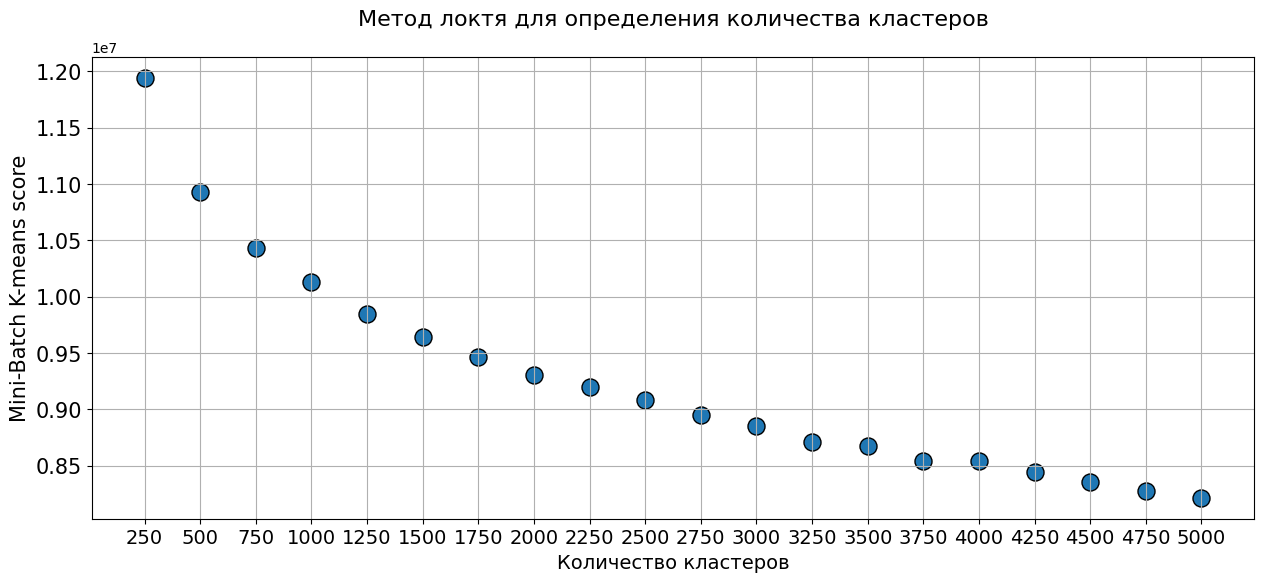

In [67]:
plt.figure(figsize=(15,6))
plt.title("Метод локтя для определения количества кластеров\n",fontsize=16)
plt.scatter(x=[i for i in range(250, 5250, 250)],y=mbk_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Количество кластеров",fontsize=14)
plt.ylabel("Mini-Batch K-means score",fontsize=15)
plt.xticks([i for i in range(250, 5250, 250)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

Пожалуй, и в этом методе точка перегиба находится где-то в области 3000 кластеров.

Сохраняю для скорости перезапуска тетради:
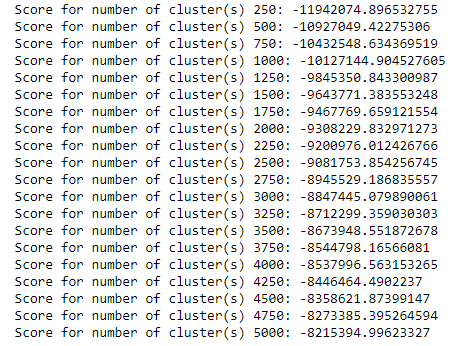
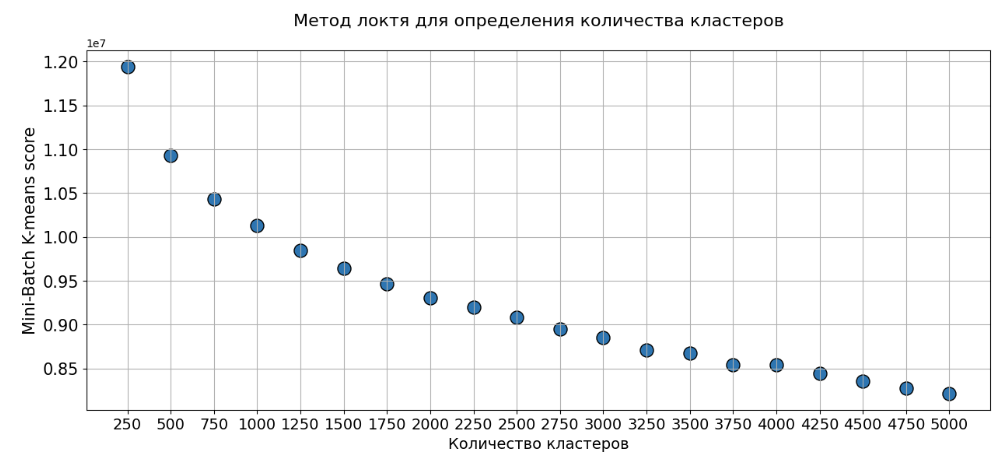

In [68]:
# инициализируем модель мини-батчей

mbk = MiniBatchKMeans(init="k-means++",n_clusters=3000, max_no_improvement=10, verbose=0, random_state=0)

start1 = time()

mbk.fit(scaled_base_small)

end1 = time()
t_mini_batch = (end1 - start1) / 60
t_mini_batch

0.22436517477035522

In [69]:
# зафиксируем метки кластеров

labels_mbk = mbk.labels_

In [70]:
# рассчитаем коэффициент силуэта

sil_mbk = metrics.silhouette_score(scaled_base_small, labels_mbk, metric='euclidean')
print("Коэффициент силуэта:", sil_mbk)

Коэффициент силуэта: 0.019706806746633918


Зафиксирую, так как долгий расчет
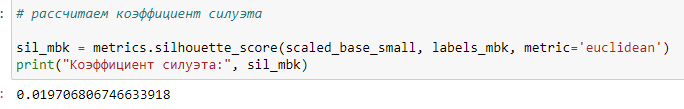

In [71]:
db_mbk = metrics.davies_bouldin_score(scaled_base_small, labels_mbk)
print("Индекс Дэвиса-Боулдина:", db_mbk)

ch_mbk = metrics.calinski_harabasz_score(scaled_base_small, labels_mbk)
print("Индекс Калински-Харабаша:", ch_mbk)

Индекс Дэвиса-Боулдина: 2.581122665702157
Индекс Калински-Харабаша: 106.08203323575387


Величина коэффициента силуэта в три раза ниже, чем у модели K-Means, и все еще лежит в области околонулевых значений. Величины других коэффициентов чуть ниже по сравнению с методом K-Means.

### Метод DBSCAN

Метод, по описанию, является более требовательным к памяти при расчетах, нежели метод K-Means. Как можно сразу оптимизировать процесс?  В описании метода предлагают использовать кластеризацию OPTICS в сочетании с extract_dbscan методом. Или сжать данные, используя BIRCH.

In [72]:
for samples in range(2, 10, 2):
    for ep in range(2, 8, 1):
        dbs = DBSCAN(eps=ep/10, min_samples=samples).fit(scaled_base_small)
        labs = dbs.labels_
        metr = metrics.davies_bouldin_score(scaled_base_small, labs)
        n_clust = len(set(labs))
        print("Score for number of cluster(s):", samples, ep, metr, n_clust)

Score for number of cluster(s): 2 2 1.1019632007228684 4498
Score for number of cluster(s): 2 3 1.1120592680151755 4762
Score for number of cluster(s): 2 4 1.1198156766930625 4962
Score for number of cluster(s): 2 5 1.1198674795521377 5087
Score for number of cluster(s): 2 6 1.1215694032016357 5294
Score for number of cluster(s): 2 7 1.1235301032894125 5522
Score for number of cluster(s): 4 2 1.1190153672756118 739
Score for number of cluster(s): 4 3 1.140260964869309 877
Score for number of cluster(s): 4 4 1.1657146753209784 966
Score for number of cluster(s): 4 5 1.1777947762125651 1007
Score for number of cluster(s): 4 6 1.1874010901318957 1071
Score for number of cluster(s): 4 7 1.196415446271383 1125
Score for number of cluster(s): 6 2 1.1348263015573743 275
Score for number of cluster(s): 6 3 1.1492603897755382 357
Score for number of cluster(s): 6 4 1.1724180200616974 444
Score for number of cluster(s): 6 5 1.1892684562179878 491
Score for number of cluster(s): 6 6 1.20328240638

Сохраняю для скорости перезапуска тетради:
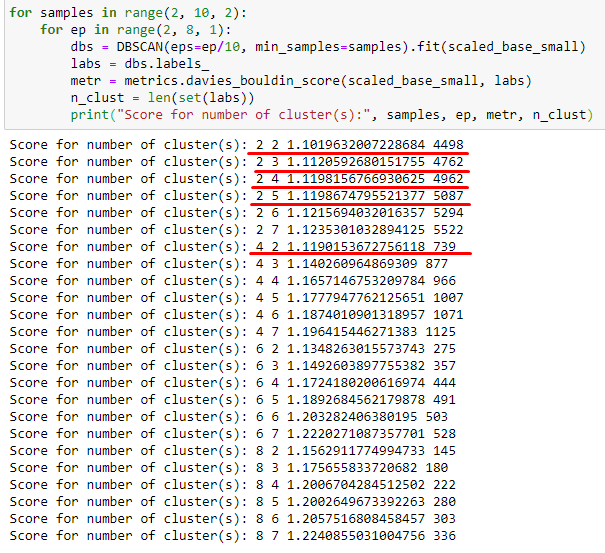

Еслил ориентироваться на значение индекса Дэвиса-Боулдина, то чем ближе значение индекса к нулю, тем лучше сформировалис кластеры. Наилучшие значения метрики получились в случаях:
- минимальное количество образцов вокруг кластера - 2, с расстоянием вокруг образца от 0,2 до 0,5;
- и минимальное количество образцов вокруг кластера - 4, с расстояние вокруг образца 0,2.

При этом, в случае минимум 4 соседей для кластера количество этих кластеров определено как 739. А если соседей будет только 2, то кластеров получается от 4500 до 5100 штук.

In [73]:
# иницируем лучшую модель

dbscan = DBSCAN(eps=0.2, min_samples=4)

start2 = time()

dbscan.fit(scaled_base_small)

end2 = time()
t_dbscan = (end2 - start2) / 60
t_dbscan

0.491245965162913

In [74]:
# зафиксируем метки кластеров

labels_dbscan = dbscan.labels_

In [75]:
# количество сформированных кластеров

n_clusters_ = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_clusters_

738

In [76]:
# рассчитаем индексы

db_dbscan = metrics.davies_bouldin_score(scaled_base_small, labels_dbscan)
print("Индекс Дэвиса-Боулдина:", db_dbscan)

ch_dbscan = metrics.calinski_harabasz_score(scaled_base_small, labels_dbscan)
print("Индекс Калински-Харабаша:", ch_dbscan)

Индекс Дэвиса-Боулдина: 1.1190153672756118
Индекс Калински-Харабаша: 7.651764887969215


In [77]:
# рассчитаем коэффициент силуэта

sil_dbscan = metrics.silhouette_score(scaled_base_small, labels_dbscan, metric='euclidean')
print("Коэффициент силуэта:", sil_dbscan)

Коэффициент силуэта: -0.26236560724103625


Долгий расчет.
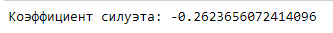
ОТрицательное значение указывает на неверную кластеризацию.

Несмотря на описание метода, модель обработала данные весьма быстро. Не пришлось использовать другие модификации методики.

### Иерархическая кластеризация

Неприменима при таком объеме входящих данных.

Попробовал через FeatureAgglomeration, но не понял ее смысла. Количество кластеров меньше или равно количеству параметров данных. Что дальше с этим делать - неясно.

### Выбор метода кластеризации

Получается, что удалось рассмотреть 4 методики, и наилучшей кажется методика Mini-Batch K-Means. Она быстрее рассчитывается, обладает неплохими значениями использованных метрик. 

In [78]:
scaled_base_large = scaler.fit_transform(base_large)

start3 = time()

mbk.fit(scaled_base_large)

end3 = time()
t_mini_batch_l = (end3 - start3) / 60
t_mini_batch_l

0.2156855305035909

In [79]:
labels_mbk_l = mbk.labels_
labels_mbk_l.shape

(291813,)

## Поиск соответствий

### Поиск с помощью FAISS

Сижу на винде, лень разбираться как задействовать GPU. 

In [80]:
base_small_index = {k: v for k, v in enumerate(base_small.index.to_list())}

def accuracy_n(targets, predict, base_index=base_small_index):
    acc = 0
    for target, candidates in zip(targets.tolist(), predict):
        acc += int(target in [base_index[number] for number in candidates])

    return (acc / len(targets) * 100)

In [81]:
# поиск обычным перебором занимает слишком много времени
# возьмем другой класс

#nlist = 1000  # number of clusters

#quantiser = faiss.IndexFlatL2(dimension)  

#index = faiss.IndexIVFFlat(quantiser, dimension, nlist,   faiss.METRIC_L2)

In [82]:
#index = faiss.index_factory(dimension, "IVF262144,PQ64", faiss.METRIC_L2)

Для такой модификации индекса важно, чтобы на обучение и поиск подавались данные в той же размерности, что и размерность индекса. Наши данные сейчас содержат 68 колонок. Необходимо уменьшить их до 64.

 По совету в группе бибилиотека была сдаунгрейжена до 1.7.4., чтоб не ждать рассчетов до второго пришествия.

In [83]:
# размерность малой выборки

print(base_small.shape)
print(validation_small.shape)

(280535, 67)
(10000, 67)


In [85]:
base_small.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '22', '23', '24', '26',
       '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50',
       '51', '52', '53', '54', '55', '56', '57', '58', '60', '61', '62', '63',
       '64', '66', '67', '68', '69', '71'],
      dtype='object')

In [87]:
# убираем колонки с "ненормальным распределением"

base_small_ni = base_small.drop(columns=['6', '33', '44'], axis=1)
validation_small_ni = validation_small.drop(columns=['6', '33', '44'], axis=1)

In [88]:
# проверяем

print(base_small_ni.columns)
print(validation_small_ni.columns)

Index(['0', '1', '2', '3', '4', '5', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '22', '23', '24', '26', '27',
       '28', '29', '30', '31', '32', '34', '35', '36', '37', '38', '39', '40',
       '41', '42', '43', '45', '46', '47', '48', '49', '50', '51', '52', '53',
       '54', '55', '56', '57', '58', '60', '61', '62', '63', '64', '66', '67',
       '68', '69', '71'],
      dtype='object')
Index(['0', '1', '2', '3', '4', '5', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '22', '23', '24', '26', '27',
       '28', '29', '30', '31', '32', '34', '35', '36', '37', '38', '39', '40',
       '41', '42', '43', '45', '46', '47', '48', '49', '50', '51', '52', '53',
       '54', '55', '56', '57', '58', '60', '61', '62', '63', '64', '66', '67',
       '68', '69', '71'],
      dtype='object')


In [89]:
# задаем гиперпараметры и инициируем метод

dims = 64
n_cells = 2000
quantizer = faiss.IndexFlatL2(dims)

idx_l2 = faiss.IndexIVFFlat(quantizer, dims, n_cells)

In [90]:
start5 = time()

idx_l2.train(np.ascontiguousarray(base_small_ni.values).astype('float32'))

end5 = time()

t_faiss_2 = (end5 - start5) / 60
t_faiss_2

0.07849171559015909

In [91]:
idx_l2.add(np.ascontiguousarray(base_small_ni.values).astype('float32'))

In [92]:
r2, idx2 = idx_l2.search(np.ascontiguousarray(validation_small_ni.values), 5)

In [93]:
# проверяю вид найденных расстояний

r2

array([[27120.473 , 30544.098 , 31674.531 , 33621.215 , 33853.473 ],
       [57257.703 , 63368.758 , 63369.56  , 67291.08  , 67692.234 ],
       [    0.    , 71460.59  , 79306.42  , 80471.28  , 80777.2   ],
       ...,
       [ 4237.4863, 70714.78  , 71897.375 , 71931.73  , 72582.91  ],
       [65287.664 , 77880.734 , 79604.984 , 81621.5   , 82530.59  ],
       [    0.    , 61865.22  , 71196.45  , 73490.63  , 73952.47  ]],
      dtype=float32)

In [94]:
# и индексов

idx2

array([[155542,  64656, 163078,   3144, 222911],
       [167676,  46872, 162917,     90, 152712],
       [ 54931,  64386,  76633, 152962, 119171],
       ...,
       [ 65791,   9134, 105120,  12694,  55507],
       [  8641, 216383, 164784, 158982, 175763],
       [149533,  13753, 217272, 209175, 112557]], dtype=int64)

In [95]:
acc_f = 0

for target, el in zip(df_validation_answer_small['Expected'].values.tolist(), idx2.tolist()):
    acc_f += int(target in [base_small_index[r2] for r2 in el])
    
print(f'Accuracy@{5} = {acc_f / len(idx2):.1%}')

Accuracy@5 = 61.5%


## Выводы

**Кластеризация**. Судя по всему, методы K-Means являются наиболее распространенными в случаях большого количества исследуемых данных. Границы весьма эфемерны: какое значение является большим, а какое еще нет. Также, очевидно, быстродействие метода зависит от используемого оборудования. Персональный ПК здесь не всегда лучший вариант.

Кроме наиболее распространенного метода K-Means существует его модификация - Mini-Batch K-Means. Он считает быстрее, но менее точно. И действительно, по значениям индексов Дэвиса-Боулдина и Калински-Харабаша видно, что просто K-Means показывает лучшие результаты.

Коэффициент силуэта в этой работе считался по 10 минут минимум, что сделало его неудобным для меня. Тем более, что его значения всегда указывали на "плохую кластеризацию".

**Осталось совершенно непонятным** куда же необходимо применить полученные кластеры? Как произвести расчет расстояний до центроидов кластеров при поиске соседей?

**Поиск соответствий**. Подергали FAISS.

С использованием FAISS данные обработаны до 61,5% значения метрики.

**Что можно было сделать лучше:**
- нас просили использовать еще другие метода кластеризации - не сделано
- попробовать библиотеку Qdrant - не сделано
- поискать соседей прямым подсчетом расстояний с использованием кластеров от методов кластеризации - не сделано
- использовать различные виды расстояний при использовании методов кластеризации и мэтчинга - не сделано. Следует отметить, что некоторые типы векторов мэтчинга могут использовать только один тип расстояния.
- работать не только на малом датасете, но и на большом - увы, моя пекарня не казенная.